In [1]:
import sys
sys.path.append('../')
from utils import plot_task, load_dataloader, plot_l23_prediction, load_exp_args, get_pca_variances, \
    get_prediction,plot_l5_prediction

In [2]:
exp_args = load_exp_args(checkpoint_dir="../checkpoints/mnist/shallow_mlp/fig2/args")
ckpt_dir_dict = {"exp_name": 'fig2', "suffix_args": ['seed'], "sub_dir": ""}
exp_args

[Namespace(seed=1, input_dim=784, hidden_dim=128, latent_dim=32, td=1, l23_modulation_factor=0.3, thal_l5_sparsity=0.0, ablate_thal_l5=False, ablate_delay=False, ablate_topdown=False, l23_l5_fa=False, fa_sparsity=0.0, ablate_l23_l5=False, digit_mode='variable', topdown_mode='random_walk', noise=0.0, lr=0.001, epoch=2, batch_size=32, continue_training=False),
 Namespace(seed=2, input_dim=784, hidden_dim=128, latent_dim=32, td=1, l23_modulation_factor=0.3, thal_l5_sparsity=0.0, ablate_thal_l5=False, ablate_delay=False, ablate_topdown=False, l23_l5_fa=False, fa_sparsity=0.0, ablate_l23_l5=False, digit_mode='variable', topdown_mode='random_walk', noise=0.0, lr=0.001, epoch=2, batch_size=32, continue_training=False)]

/home/kevin/miniconda3/envs/torch-env/lib/python3.10/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/kevin/miniconda3/envs/torch-env/lib/python3.10/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


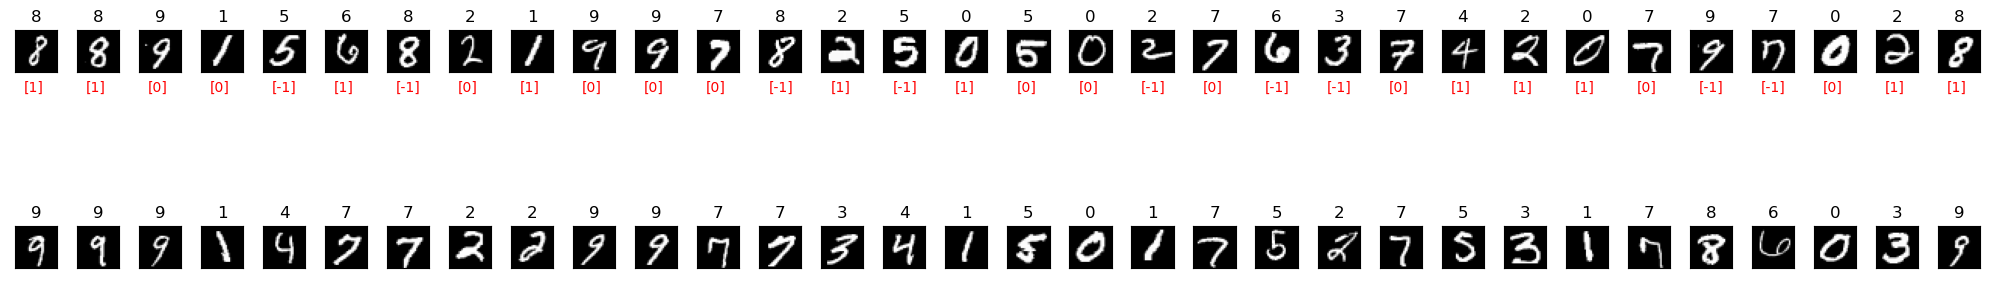

In [3]:
dataloader = load_dataloader('mnist', exp_args[0])
plot_task(dataloader, 'mnist', save_fig=True)

In [4]:
pca_vars = get_pca_variances(exp_args, model_name='shallow_mlp', task_name='mnist', ckpt_dir_dict=ckpt_dir_dict)

Experiment: dummy logger for loading model
Loading model from /home/kevin/Documents/phd/projects/ssl_neocortical/checkpoints/mnist/shallow_mlp/fig2/model_seed_1.pth
Experiment: dummy logger for loading model
Loading model from /home/kevin/Documents/phd/projects/ssl_neocortical/checkpoints/mnist/shallow_mlp/fig2/model_seed_2.pth


/home/kevin/miniconda3/envs/torch-env/lib/python3.10/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/kevin/miniconda3/envs/torch-env/lib/python3.10/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [5]:
pca_vars

,l23_acc,l5_acc,l23_accum_var_explained,l5_accum_var_explained,seed,input_dim,hidden_dim,latent_dim,td,l23_modulation_factor,...,l23_l5_fa,fa_sparsity,ablate_l23_l5,digit_mode,topdown_mode,noise,lr,epoch,batch_size,continue_training
0,0.246123,0.548274,"[0.46209437, 0.4182149, 0.025876416, 0.0125772...","[0.31501746, 0.27321258, 0.04265245, 0.0386849...",1,784,128,32,1,0.3,...,False,0.0,False,variable,random_walk,0.0,0.001,2,32,False
1,0.233117,0.583792,"[0.4428217, 0.40607226, 0.06207977, 0.01527509...","[0.40490708, 0.24018608, 0.04121597, 0.0355757...",2,784,128,32,1,0.3,...,False,0.0,False,variable,random_walk,0.0,0.001,2,32,False


In [6]:
predictions, l5_confusion_matrix = get_prediction(exp_args, model_name='shallow_mlp', task_name='mnist', ckpt_dir_dict=ckpt_dir_dict)

Experiment: dummy logger for loading model
Loading model from /home/kevin/Documents/phd/projects/ssl_neocortical/checkpoints/mnist/shallow_mlp/fig2/model_seed_1.pth


/home/kevin/miniconda3/envs/torch-env/lib/python3.10/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/kevin/miniconda3/envs/torch-env/lib/python3.10/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


Experiment: dummy logger for loading model
Loading model from /home/kevin/Documents/phd/projects/ssl_neocortical/checkpoints/mnist/shallow_mlp/fig2/model_seed_2.pth


/home/kevin/miniconda3/envs/torch-env/lib/python3.10/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/kevin/miniconda3/envs/torch-env/lib/python3.10/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


directory of dataset to load mnist: /home/kevin/Documents/phd/projects/ssl_neocortical/dataset/data
not saving fig


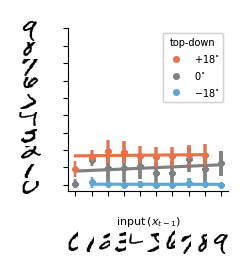

In [11]:
plot_l23_prediction(predictions, name='fig2_mnist_l23_prediction.svg', task='mnist', 
                    plot_kwargs={"x_box_alignment":(0.5, 2.6), "y_box_alignment": (2.2, 0.5), 
                                 "figsize": (2.3, 2.3)}, save_fig=False)

directory of dataset to load mnist: /home/kevin/Documents/phd/projects/ssl_neocortical/dataset/data
not saving fig


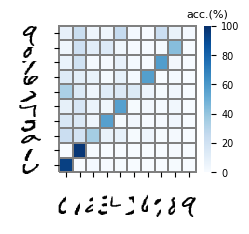

In [8]:
plot_l5_prediction(l5_confusion_matrix*100, name='fig2_mnist_l5_prediction.svg',  task='mnist',
                    plot_kwargs={"x_box_alignment":(0.5, 1.7), "y_box_alignment": (1.6, 0.5),
                                 "figsize": (2.2, 1.9)}, save_fig=False)